In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/Bhushan0130/Datasets/main/Breast%20Cancer%20Dataset.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
df.drop(columns = ['Unnamed: 32'], inplace = True)

In [5]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [8]:
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

Benign 357
Malingnanat 212


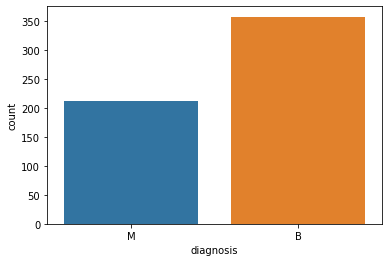

In [14]:
ax = sns.countplot(df['diagnosis'])
B, M = df ['diagnosis'].value_counts()
print('Benign', B)
print('Malingnanat', M)

In [20]:
X = df.iloc[:,2:].values
Y = df.iloc[:,1].values

### Encoding Categorical data

In [21]:
from sklearn.preprocessing import LabelEncoder

labelEncoder_X_1 = LabelEncoder()
y = labelEncoder_X_1.fit_transform(Y)

### Splitting the dataset into the Training set and Test Set

In [40]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 51)

### Feature Scalling

In [41]:
from sklearn.preprocessing import StandardScaler

In [42]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [43]:
x_test

array([[ 0.28980428, -0.48302075,  0.23263499, ..., -0.42121729,
        -0.90101614, -1.16294897],
       [-0.73054762, -0.87299264, -0.73985578, ..., -0.42264735,
        -0.39646446, -0.96177145],
       [-0.62101832, -0.37302867, -0.64705765, ..., -1.08524188,
         0.57553952, -1.07459801],
       ...,
       [-0.41060677, -0.20304092, -0.47279873, ..., -1.50965195,
        -1.21821591, -1.70439706],
       [ 2.68215478,  0.78938756,  2.5790419 , ...,  1.95824388,
         1.29712262,  0.48408002],
       [-1.50993506, -0.76300057, -1.46292534, ..., -0.10104272,
         0.0672779 ,  1.07089752]])

In [44]:
!pip install keras

In [48]:
import keras
from keras.models import Sequential 
from keras.layers import Dense

#### Adding the input and first hidden layer

In [56]:
# Adding the input and first Hidden layer
model = Sequential()
model.add(Dense(units = 16, activation = 'relu', input_dim = 30))


In [57]:
# Adding the second hidden_layer
model.add(Dense(units = 16,activation = 'relu'))

In [60]:
# Adding the output
model.add(Dense(units = 1, activation = 'sigmoid' ))

In [61]:
# Adding optimizer
model.compile(optimizer= 'adam', loss = 'binary_crossentropy', metrics = ['accuracy']  )

In [78]:
model.fit(x_train, y_train, batch_size = 100 , epochs =200)

Epoch 1/200
4/4 [==============================] - 0s 3ms/step - loss: 0.4167 - accuracy: 0.9975
Epoch 2/200
4/4 [==============================] - 0s 4ms/step - loss: 0.4160 - accuracy: 0.9975
Epoch 3/200
4/4 [==============================] - 0s 3ms/step - loss: 0.4154 - accuracy: 0.9975
Epoch 4/200
4/4 [==============================] - 0s 4ms/step - loss: 0.4148 - accuracy: 0.9975
Epoch 5/200
4/4 [==============================] - 0s 3ms/step - loss: 0.4141 - accuracy: 0.9975
Epoch 6/200
4/4 [==============================] - 0s 3ms/step - loss: 0.4135 - accuracy: 0.9975
Epoch 7/200
4/4 [==============================] - 0s 3ms/step - loss: 0.4128 - accuracy: 0.9975
Epoch 8/200
4/4 [==============================] - 0s 4ms/step - loss: 0.4122 - accuracy: 0.9975
Epoch 9/200
4/4 [==============================] - 0s 4ms/step - loss: 0.4115 - accuracy: 0.9975
Epoch 10/200
4/4 [==============================] - 0s 4ms/step - loss: 0.4109 - accuracy: 0.9975
Epoch 11/200
4/4 [===========

In [79]:
# predicting
y_test_predict = model.predict(x_test)

In [80]:
y_test_predict = (y_test_predict > 0.5)

In [81]:
y_test

array([0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0])

In [82]:
# print(y_test_predict)

In [83]:
# making the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_test_predict)

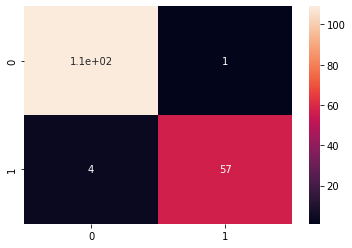

In [84]:
sns.heatmap(cm, annot = True)